# Regression, 회귀

# 보스턴 주택 가격 예측

## 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sklearn 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# 딕셔너리 형태이므로 key 값 확인
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

In [5]:
# 데이터 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [6]:
# 데이터 프레임 결합
df = pd.concat([data, target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

### 데이터 분석

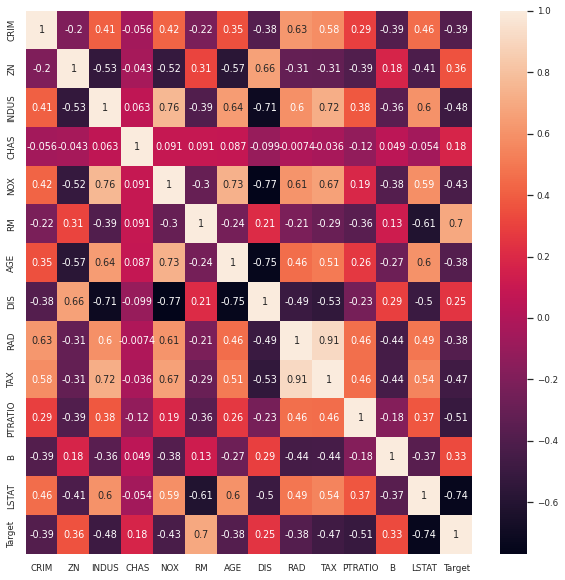

In [9]:
# 상관관계 행렬
df_corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True)
plt.show()

# 

In [10]:
# 타겟과 연관성이 높은 항목 추출
corr_order = df.corr().loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [11]:
# Target 에 영향을 주는 값 뽑아내기
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


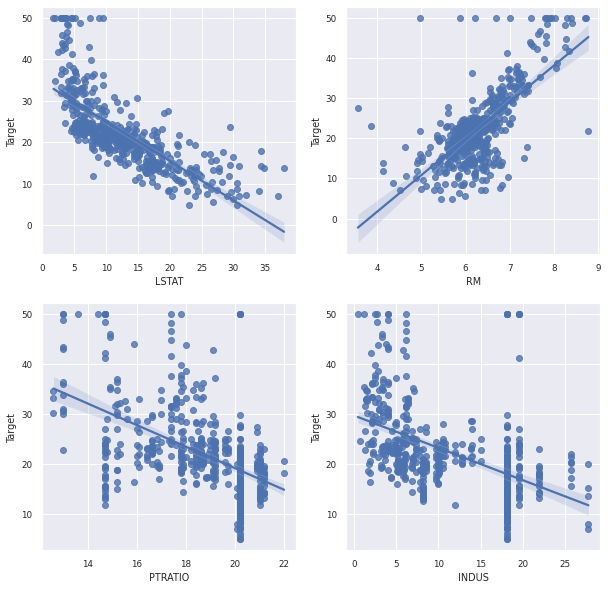

In [12]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10, 10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2, 2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

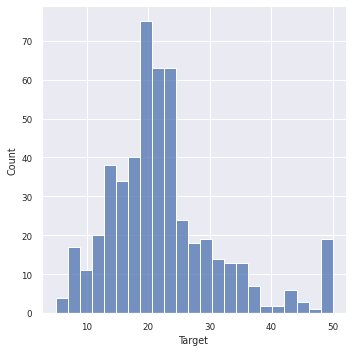

In [13]:
# Target 데이터 분포 확인하기

sns.displot(x='Target', kind='hist', data=df)
plt.show()

### 데이터 전처리 - 피처 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.iloc[:, :-1]

scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영 -> 0~1 사이 값으로
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


## 데이터셋 나누기

### feature vs. label

In [15]:
X = df.drop(['Target'], axis=1)
y = df['Target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### test vs. train

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42) # random_state : seed값

## 베이스라인 모델 : 선형 회귀

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"회귀계수(기울기) \t a : {np.round(lr.coef_, 1)}")
print(f"상수량(절편) \t b : {np.round(lr.intercept_, 1)}")

회귀계수(기울기) 	 a : [-11.1   4.3   0.8   2.8  -8.9  19.7   0.3 -16.1   7.2  -6.4  -8.9   3.9
 -19.6]
상수량(절편) 	 b : 26.5


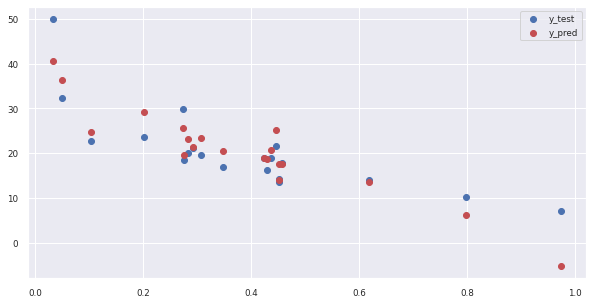

In [18]:
# 예측
y_test_pred = lr.predict(X_test)

# 예측값, 실제값의 분포
plt.figure(figsize=(10, 5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

## 모델 성능 평가

잔차(residuals) : 실제값과 예측값의 차이

- 성능 평가 지표

|구분|수식|설명|
|---|---|---|
|MAE(Mean Absolute Error)|$\frac{1}{n}\sum_{i=1}^n |Y_i-\hat{Y_i}|$|실제값과 예측값의 차이의 절대값을 평균한 값|
|MSE(Mean Squared Error)|$\frac{1}{n}\sum_{i=1}^n (Y_i-\hat{Y_i})$|실제값과 예측값의 차이의 제곱을 평균한 값|
|RMSE(Root Mean Squared Error)|$\sqrt{\frac{1}{n}\sum_{i=1}^n (Y_i-\hat{Y_i})}$|MSE의 제곱근|

In [19]:
from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 22.024800473813276
Test MSE : 19.691370337597846


In [20]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
mse_scores = -1 * cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"개별 Fold의 MSE : {np.round(mse_scores, 4)}")
print(f"평균 MSE : {np.mean(mse_scores)}")

개별 Fold의 MSE : [23.1622 23.6179 26.2978 22.4482 23.2908]
평균 MSE : 23.763366693044972


### Overfitting vs. Underfitting
- Overfitting : 학습에 사용한 데이터와 비슷한 데이터는 잘 예측하지만, 새로운 특성을 갖는 데이터에 대해서는 예측력이 떨어지는 현상

- Underfitting : 훈련 데이터의 특성을 파악하기 충분하지 않을 정도로 모델 구성이 간단하거나, 데이터 개수가 부족할 때 발생

In [21]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)

print(f"원본 학습 데이터셋 : {X_train.shape}")
print(f"2차 다항식 변환 데이터셋 : {X_train_poly.shape}")

원본 학습 데이터셋 : (486, 13)
2차 다항식 변환 데이터셋 : (486, 105)


In [22]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 6.005148224722013
Test MSE : 9.451657600027893


In [23]:
# 5차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=5)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

# 다항식이 올라갈수록, Train 데이터에 대한 오차는 적어지지만, Test 데이터에 대한 오차는 커진다. => overfitting

Train MSE : 4.611088219355402e-24
Test MSE : 565.0155645828629


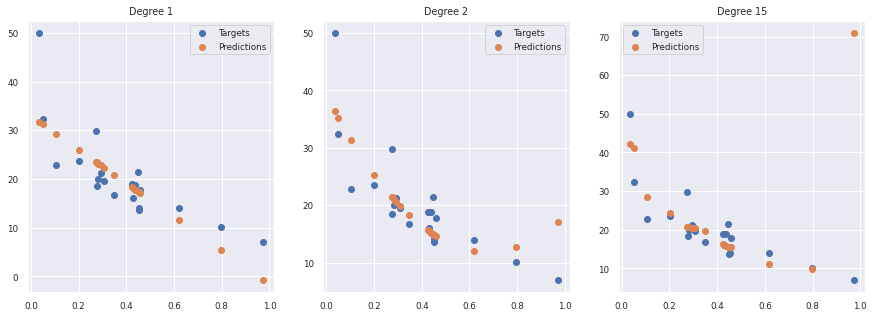

In [24]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15, 5))

for n, deg in enumerate([1, 2, 15]):
  ax1 = plt.subplot(1, 3, n+1)

  pf = PolynomialFeatures(degree = deg)
  X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
  X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])

  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)

  y_test_pred = lr.predict(X_test_poly)

  # 실제값 분포
  plt.scatter(X_test.loc[:, ['LSTAT']], y_test, label = 'Targets')
  # 예측값 분포
  plt.scatter(X_test.loc[:, ['LSTAT']], y_test_pred, label = 'Predictions')
  # 제목 표시
  plt.title(f"Degree {deg}")
  # 범례 표시
  plt.legend()
  
plt.show()

### Regularization

- L2 규제 : 모델의 '가중치의 제곱합'에 패널티를 부과
- L1 규제 : 모델의 '가중치 절대값의 합'에 패널티를 부과

=> 모델의 복잡도를 낮춤.

In [25]:
# L2 규제
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 33.52579062043652
Test MSE : 24.700095640644562


In [26]:
# L1 규제
from sklearn.linear_model import Ridge

rdg = Ridge(alpha=0.05)
rdg.fit(X_train_poly, y_train)

y_train_pred = rdg.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 30.139570596252536
Test MSE : 23.102569760925057


In [27]:
# L1, L2 를 모두 적용한 ElasticNet
from sklearn.linear_model import ElasticNet

ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(X_train_poly, y_train)

y_train_pred = ela.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

y_test_pred = ela.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE : {test_mse}")

Train MSE : 35.020621716466465
Train MSE : 28.15274190524578


## 트리 기반 모델 - 비선형 회귀 : 의사결정나무

In [28]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 15.435147634812873
Test MSE : 14.164874546873838


## 트리 기반 모델 - 비선형 회귀 : 랜덤 포레스트

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 10.985459055665647
Test MSE : 8.40418406345291


## 트리 기반 모델 - 비선형 회귀 : XGBoost

In [30]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE : {train_mse}")

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE : {test_mse}")

Train MSE : 2.3020225451388243
Test MSE : 4.320681863795989
